#### Name: Sumanasekara W.K.G.G.
#### Index: 190610E

In [87]:
import numpy as np
from scipy.linalg import null_space
import cv2 as cv 
import matplotlib.pyplot as plt

file_path = "templeSparseRing/"

In [88]:
f = open(file_path+"templeSR_par.txt", 'r')
assert f is not None

n = int(f.readline())
im_fn, K, R, t= [], [], [], []

for _ in range(2):
    l = f.readline().split()
    im_fn.append(l[0])
    K.append(np.array([float(i) for i in l[1: 10]]).reshape(3, 3))
    R.append(np.array([float(i) for i in l[10: 19]]).reshape(3, 3))
    t.append(np.array([float(i) for i in l[19: 22]]).reshape(3, 1))

In [89]:
im = [cv.imread(file_path+name, cv.IMREAD_COLOR) for name in im_fn]
P = [K[i] @ np.hstack((R[i], t[i])) for i in range(2)]

In [90]:
def skew(X):
    X = X.ravel()
    return np.array(((0, -X[2], X[1]), (X[2], 0, -X[0]), (-X[1], X[0], 0)))

In [91]:
C = null_space(P[0])
C = C * np.sign(C[0, 0])
e2 = P[1] @ C
e2x = skew(e2)

F = e2x @ P[1] @ np.linalg.pinv(P[0])
F

array([[-2.87071497e-04, -3.96261289e-02,  2.94221686e+02],
       [-3.55039713e-02,  1.65329260e-04,  1.78860854e+01],
       [-2.76702814e+02,  2.12942175e+01, -9.06669374e+03]])

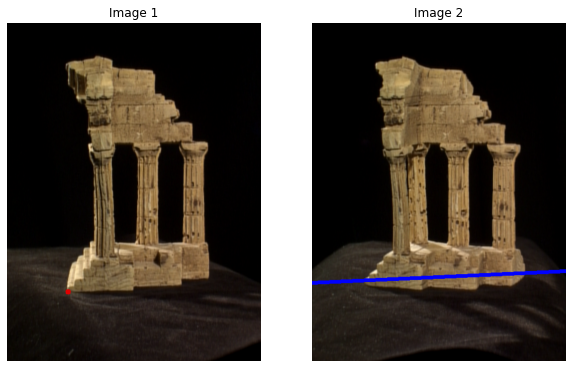

In [92]:
X = np.array((130, 115, 1))
cv.circle(im[0], X[:2], 5, (0, 0, 225), -1)

l2 = F @ X.T
p1 = np.array((0, (l2[0]*0+l2[2]/l2[1]))).astype(int)
p2 = np.array((500, (l2[0]*500+l2[2])/l2[1])).astype(int)
cv.line(im[1], (p1[0], p1[1]), (p2[0], p2[1]), (255, 0, 0), 5)

fig, ax = plt.subplots(1, 2, figsize = (10, 15))
ax[0].imshow(np.rot90(cv.cvtColor(im[0], cv.COLOR_BGR2RGB)))
ax[0].axis('off')
ax[0].set_title("Image 1")
ax[1].imshow(np.rot90(cv.cvtColor(im[1], cv.COLOR_BGR2RGB)))
ax[1].axis('off')
ax[1].set_title("Image 2")
plt.show()